In [29]:
import gym
import matplotlib.pyplot as plt
import time
from src.atari_wrappers import make_atari

from src.atari_wrappers import EpisodicLifeEnv, FireResetEnv, WarpFrame, ClipRewardEnv, FrameStack, wrap_deepmind

%matplotlib inline

In [2]:
envs = [e.id for e in gym.envs.registry.all() if 'Pacman' in e.id ]
envs

['MsPacman-ramNoFrameskip-v0',
 'MsPacman-ramDeterministic-v0',
 'MsPacman-v4',
 'MsPacman-ramDeterministic-v4',
 'MsPacmanNoFrameskip-v4',
 'MsPacman-ramNoFrameskip-v4',
 'MsPacman-ram-v4',
 'MsPacmanDeterministic-v4',
 'MsPacman-ram-v0',
 'MsPacman-v0',
 'MsPacmanDeterministic-v0',
 'MsPacmanNoFrameskip-v0']

In [3]:
seed = 0

In [10]:
def get_summary(env):
    
    frames = 0
    
    
    env.reset()
    env.seed(seed)
    done = False
    
    tic = time.time()
    while not done: 
        _, _, done, _ = env.step(env.action_space.sample())
        frames += 1
    toc = time.time() - tic
    
    return frames, toc

# Normal Pacman - random skip

In [21]:
env = gym.make('MsPacman-v0')
f, t = get_summary(env)
env.close()
print('INFO: {}frames taken {:.2f}s'.format(f, t))

[2017-12-28 19:10:52,322] Making new env: MsPacman-v0


INFO: 640frames taken 0.31s


# NoFrameSkip

In [23]:
env = gym.make('MsPacmanNoFrameskip-v4')
f, t = get_summary(env)
env.close()
print('INFO: {}frames taken {:.2f}s'.format(f, t))

[2017-12-28 19:11:07,379] Making new env: MsPacmanNoFrameskip-v4


INFO: 1793frames taken 0.35s


# 4 Frames skip

In [27]:
env = make_atari('MsPacmanNoFrameskip-v4')
f, t = get_summary(env)
env.close()
print('INFO: {}frames taken {:.2f}s'.format(f, t))

[2017-12-28 19:11:29,765] Making new env: MsPacmanNoFrameskip-v4


INFO: 695frames taken 0.61s


# Warp Frame

[2017-12-28 19:26:05,807] Making new env: MsPacmanNoFrameskip-v4


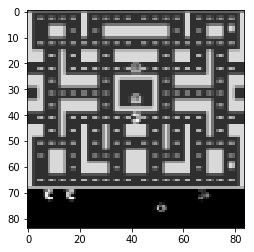

In [41]:
env = make_atari('MsPacmanNoFrameskip-v4')
env = EpisodicLifeEnv(env)
env = WarpFrame(env)


env.seed(seed)
obs = env.reset()
plt.imshow(obs.reshape(84, 84), cmap='gray')
env.close()

# Frame Stacking

[2017-12-28 19:34:06,926] Making new env: MsPacmanNoFrameskip-v4


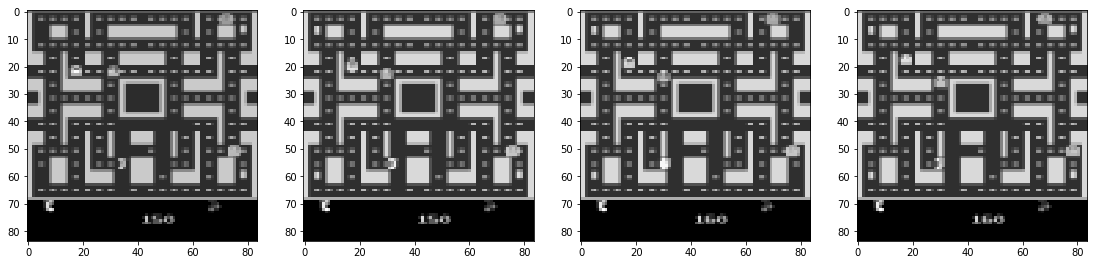

In [55]:
env = make_atari('MsPacmanNoFrameskip-v4')
env = EpisodicLifeEnv(env)
env = WarpFrame(env)
env = FrameStack(env, 4)
env.seed(seed)
obs = env.reset()
for i in range(240):
    obs, _, _, _ = env.step(env.action_space.sample())
env.close()
obs = obs.__array__()

fig, axs = plt.subplots(1, 4, figsize=(19, 6))
for i in range(4):
    axs[i].imshow(obs[:, :, i], cmap='gray')